# PARKINGSON'S DISEASE EXPLORATORY DATA ANALYSIS AND PREDICTION WITH MACHINE LEARNING
   

In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

In [2]:
os.getcwd()

'C:\\Users\\IDRISS KEMAYOU\\Pictures'

In [3]:
data = pd.read_csv(r'C:\Users\IDRISS KEMAYOU\Pictures\pd_speech_features\pd_speech_features.csv',header = 1)

In [4]:
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [5]:
data.shape

(756, 755)

In [6]:
illness = data[data['class']==1]
healthy = data[data['class']==0]

In [7]:
healthy.shape[0]

192

# ANALYSING GENDER 

Text(0.5, 1.0, 'Frequency of Gender by Class')

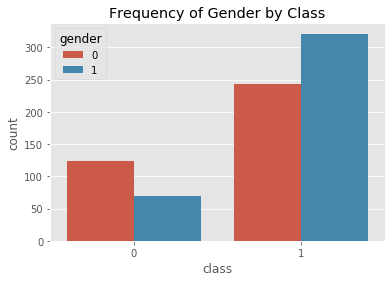

In [8]:
ax = sns.countplot(x='class',data=data, hue = 'gender')
ax.set_title('Frequency of Gender by Class')

In [9]:
data.describe().T
#DESCRIBE METHOD IS A USEFULL METHOD TO HAVE A GLOBAL VIEW OF SUMMARY STATISTIC

,count,mean,std,min,25%,50%,75%,max
id,756.0,125.500000,72.793721,0.000000,62.750000,125.500000,188.250000,251.00000
gender,756.0,0.515873,0.500079,0.000000,0.000000,1.000000,1.000000,1.00000
PPE,756.0,0.746284,0.169294,0.041551,0.762833,0.809655,0.834315,0.90766
DFA,756.0,0.700414,0.069718,0.543500,0.647053,0.700525,0.754985,0.85264
RPDE,756.0,0.489058,0.137442,0.154300,0.386537,0.484355,0.586515,0.87123
...,...,...,...,...,...,...,...,...
tqwt_kurtosisValue_dec_33,756.0,12.375335,16.341665,1.628700,3.114375,4.741450,12.201325,73.53220
tqwt_kurtosisValue_dec_34,756.0,14.799230,15.722502,1.861700,3.665925,6.725700,21.922050,62.00730
tqwt_kurtosisValue_dec_35,756.0,14.751559,14.432979,1.955900,3.741275,7.334250,22.495175,57.54430
tqwt_kurtosisValue_dec_36,756.0,31.481110,34.230991,2.364000,3.948750,10.637250,61.125325,156.42370


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [11]:
data.isna().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

# ANALYSING FORMANT FREQUENCIES BY GENDER 

In [12]:
frequency_ill= illness[['gender','f1','f2','f3','f4']]
frequency_health = healthy[['gender','f1','f2','f3','f4']]
frequency_ill.head()

,gender,f1,f2,f3,f4
0,1,539.342735,1031.849040,2447.162183,3655.054806
1,1,564.363614,1016.367294,2383.565201,3498.681572
2,1,548.444604,1032.406341,2357.826954,3678.128717
3,0,819.529588,1201.813897,3154.035654,4122.163933
4,0,846.796144,1215.346469,3201.513132,4085.456839


In [13]:
frequency_ill['mean'] = frequency_ill[['f1','f2','f3','f4']].mean(axis=1)
frequency_health['mean'] = frequency_health[['f1','f2','f3','f4']].mean(axis=1)

C:\Users\IDRISS KEMAYOU\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\IDRISS KEMAYOU\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
frequency_ill.head()

,gender,f1,f2,f3,f4,mean
0,1,539.342735,1031.849040,2447.162183,3655.054806,1918.352191
1,1,564.363614,1016.367294,2383.565201,3498.681572,1865.744420
2,1,548.444604,1032.406341,2357.826954,3678.128717,1904.201654
3,0,819.529588,1201.813897,3154.035654,4122.163933,2324.385768
4,0,846.796144,1215.346469,3201.513132,4085.456839,2337.278146


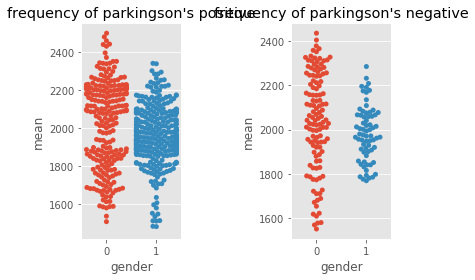

In [15]:
fig, axes = plt.subplots(1,2, sharex = True)
sns.swarmplot(x='gender', y='mean',data=frequency_ill, ax = axes[0])
sns.swarmplot(x='gender', y='mean',data=frequency_health, ax = axes[1])
axes[0].set_title("frequency of parkingson's positive")
axes[1].set_title("frequency of parkingson's negative")
plt.tight_layout()

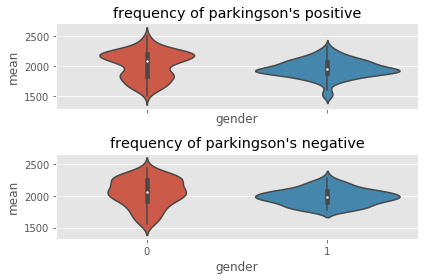

In [38]:
fig, axes = plt.subplots(2,1, sharex = True)
sns.violinplot(x='gender', y='mean',data=frequency_ill, ax = axes[0])
sns.violinplot(x='gender', y='mean',data=frequency_health, ax = axes[1])
axes[0].set_title("frequency of parkingson's positive")
axes[1].set_title("frequency of parkingson's negative")
plt.tight_layout()

Text(0.5, 1.0, 'Formant Frequency of Patient')

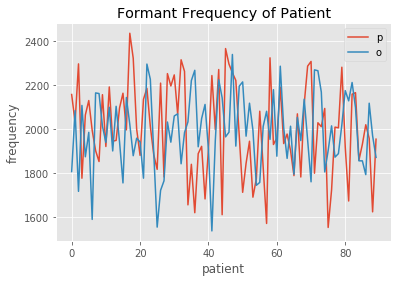

In [16]:
#looking at the mean fundamental frequency 
sample_health = frequency_health['mean'].sample(90)
sample_ill = frequency_ill['mean'].sample(90)
x = list(np.arange(len(sample_ill)))
plt.plot(x,sample_health)
plt.legend('negative')
plt.plot(x, sample_ill)
plt.legend('positive')
plt.xlabel('patient')
plt.ylabel('frequency')
plt.title('Formant Frequency of Patient')

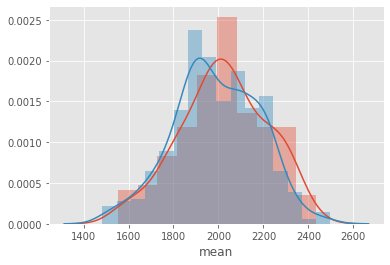

In [17]:
#distribution of frequency 
sns.distplot(frequency_health['mean'])
sns.distplot(frequency_ill['mean'])

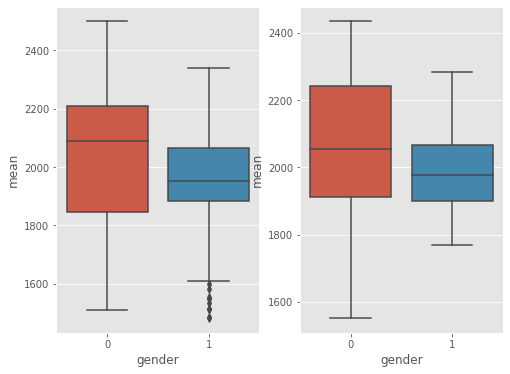

In [18]:
fig, axes = plt.subplots(1,2, figsize=(8,6))
sns.boxplot(x='gender', y='mean',data=frequency_ill, ax = axes[0])
sns.boxplot(x='gender', y='mean',data=frequency_health, ax = axes[1])
plt.show()

# ANALYSING INTENSITY PARAMETERS

In [19]:
intensity = data[['gender','meanIntensity', 'class']]
intensity.head()

,gender,meanIntensity,class
0,1,72.465512,1
1,1,71.528945,1
2,1,68.086583,1
3,0,79.190593,1
4,0,79.183495,1


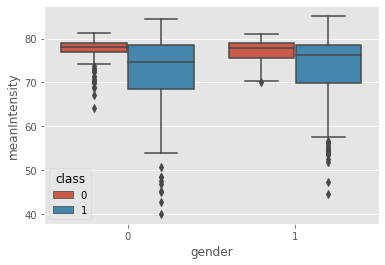

In [20]:
sns.boxplot(x='gender', y='meanIntensity', data = intensity, hue = 'class')

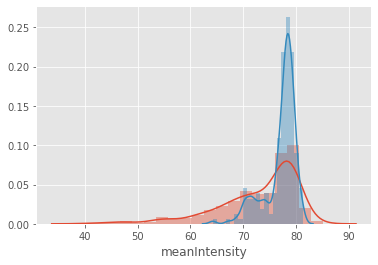

In [21]:
sns.distplot(illness['meanIntensity'])
sns.distplot(healthy['meanIntensity'])

In [22]:
table = list(np.arange(0,100,5))
percentiles_i = []
percentile_h = []

In [23]:
for i in table :
    perc = np.round(np.percentile(illness['meanIntensity'], i),2)
    per = np.round(np.percentile(healthy['meanIntensity'],i),2)
    percentiles_i.append(perc)
    percentile_h.append(per)    

In [24]:
percent = pd.DataFrame()

Text(0.5, 1.0, 'Intensity Distribution for positive and negative parkingson disease')

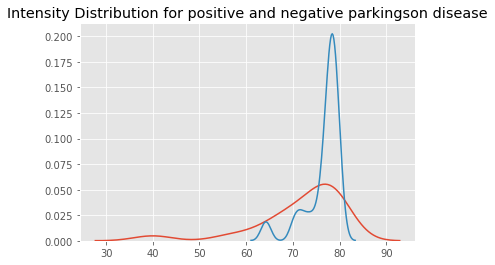

In [25]:
sns.distplot(percentiles_i,hist=False)
sns.distplot(percentile_h,hist=False)
plt.title('Intensity Distribution for positive and negative parkingson disease')

# building a machine learning model for prediction

In [239]:
parkingson = pd.read_csv(r'C:\Users\IDRISS KEMAYOU\Pictures\pd_speech_features\parkinson.data', sep = ',')
parkingson.shape

(195, 24)

In [216]:
parkingson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [288]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,f1_score
from sklearn.svm import SVC

# data preprocessing

In [289]:
#looking if data is balanced or imbalanced
count_class = pd.value_counts(parkingson['status'], sort=True).sort_index()
count_class

0     48
1    147
Name: status, dtype: int64

Text(0, 0.5, 'Frequency percentage')

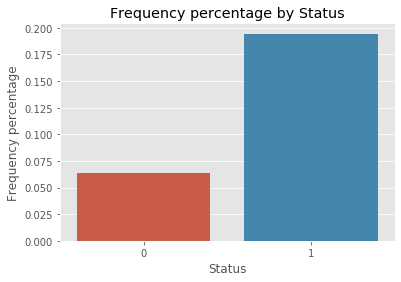

In [290]:
ax = sns.barplot(x=count_class.index, y=tuple(count_class/len(data)))
ax.set_title('Frequency percentage by Status')
ax.set_xlabel('Status')
ax.set_ylabel('Frequency percentage')

In [291]:
dataX = parkingson.drop(['name','status'], axis = 1)
y = parkingson['status']

In [292]:
dataX.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [293]:
scaler = StandardScaler()

In [294]:
X = scaler.fit_transform(dataX)

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify = y)

# prediction with logistic regression and randomforestclassifier

In [296]:
logistic = DecisionTreeClassifier(class_weight = 'balanced',random_state = 11)

In [297]:
logistic.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

In [298]:
prediction = logistic.predict(X_test)
accuracy_score(prediction, y_test)

0.8615384615384616

In [299]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [300]:
rf.score(X_train,y_train)

1.0

In [301]:
rf_prediction = rf.predict(X_test)

In [307]:
accuracy_score(rf_prediction, y_test)

0.9230769230769231

In [308]:
f1_score(rf_prediction, y_test)

0.9514563106796117

In [311]:
# predicting with support vector machine
sv = SVC(class_weight = 'balanced')
sv.fit(X_train,y_train)
prediction = sv.predict(X_test)
accuracy_score(prediction, y_test)

0.8615384615384616

In [310]:
f1_score(prediction,y_test)

0.9245283018867925

# hyperparameters tunning

In [273]:
from scipy.stats import uniform
C = [1.0,1.5,2.0,2.5]
param_grid = dict(C=C)
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator = lr, param_grid=param_grid,scoring = 'accuracy', cv = 4,n_jobs = -1)

In [274]:
grid.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1.0, 1.5, 2.0, 2.5]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=0)

In [277]:
y_pred = grid.predict(X_test)

In [278]:
grid.score(X_test,y_test)

0.8153846153846154

In [281]:
f1_score(y_pred, y_test)

0.8799999999999999

In [ ]:
#tunning hyperparameters with randomforestclassifier

In [282]:
n_estimators = [10,100,200]
max_features = [4,5,8]
params_grid = dict(n_estimators = n_estimators, max_features = max_features)
rfc = RandomForestClassifier()
search = GridSearchCV(estimator = rfc, param_grid=params_grid, cv = 3, scoring = 'accuracy', n_jobs=-1)

In [283]:
search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [284]:
pred= search.predict(X_test)

In [285]:
search.score(X_test, y_test)

0.8307692307692308

In [286]:
f1_score(pred, y_test)

0.888888888888889

In [318]:
# svm hyperparameter tunning
kernels = ['poly','rbf','sigmoid']
C = [0.1,10,100]
gamma = [1,0.1,0.01,0.001]
param_grid = dict(C=C, kernel = kernels, gamma = gamma)
svm = SVC()

In [319]:
grids = GridSearchCV(estimator = svm, param_grid = param_grid, scoring='accuracy', cv = 3, n_jobs = -1)

In [320]:
grids.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [321]:
prediction =grids.predict(X_test)

In [322]:
grids.score(X_test, y_test)

0.9538461538461539

In [323]:
f1_score(prediction, y_test)

0.9696969696969697